#### This notebook explores different family of probability distributions


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

###  Bernoulli distribution (Discrete)
This probability distribution models a random variable taking on only 2 values with probabilities p and 1-p respectiviely.

A bernoulli trial is a single trial with either of 2 outcomes where p is the probability of the successful outcome.
eg. A class or dependent variable in each example i of the training data in logistic regression is a Bernoulli outcome with its success probability $p_i$

X ~ B(p) 

i.e X is distributed as / is from Bernoulli distribution 

Here, the random variate of Bernoulli X, holds only 2 values i.e 1 for success and 0 for failure.

PDF -

$ F(X=x|p) = p^x(1-p)^{1-x}$

where x = {0,1} i.e binary outcome


### Binomial Distribution (Discrete)
A random variable follows Binomial distribution when it holds the value of number of successes from N independent Bernoulli trials where p is the probability of success for each Bernoulli trial.

X ~ Bin(n, p)

$ P(X=x|p) = {n \choose x} p^x(1-p)^{1-x}$

where the combinatoric term ${n \choose x } $ is the number of binomial sequences where we get x successes among n trials.



In [22]:
# Drawing sample from binomial distribution
# Get the number of heads for every n trials in 5 attempts
n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 5)
s

array([5, 3, 5, 1, 2])

### Poisson distribution
It models the probability of occurence of an event given number of times in a time interval when the average rate, i.e the number of times this event occurs in an interval on an average is $\lambda$ .

Random variates X represents the no. of events occuring at a particular time.

X ~ Poisson($\lambda$)

The probability for an event to occur x no. of times in an interval 

$P(X=x|\lambda) = \frac{\lambda^x exp(-\lambda)}{x!}$

eg. Fault prediction in electric cables, analysis of traffic flow.

In [ ]:
# Example - No. of earthquakes per week is Poisson distributed with the rate of 2 earthquakes per week.
# What will be the probability of observing at least 3 earthquakes in next 2 weeks, P(X >=3 ) = ?

lambda_per_week = 2                                            # for rate of earthquake per week, X ~ Poi(2)
lambda_per2week = lambda_per_week * 2                          # for rate of earthquake per 2 weeks, X ~ Poi(4)

In [ ]:
# P(atleast 3 earthquakes in 2 weeks) = P(X >= 3) = 1 - P(X <=2 )

prob_atleast_3 = 1 - stats.poisson.cdf(k=2, mu=lambda_per2week)
print(prob_atleast_3)

# using survival function = 1 - CDF
stats.poisson.sf(2, mu=lambda_per2week)

0.7618966944464556


0.7618966944464556

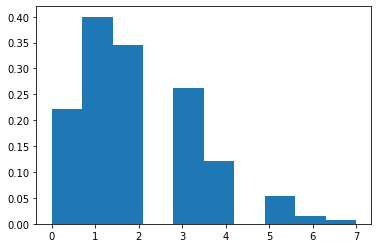

In [ ]:
# Plot for Poisson distribution for earthquake
poisson_rvs = stats.poisson(2).rvs(1000)
plt.hist(poisson_rvs, histtype='stepfilled', density=True)
plt.show()

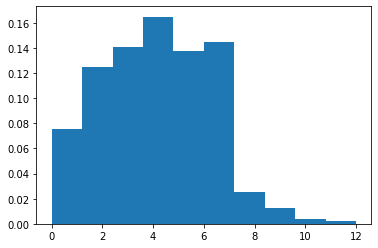

In [ ]:
# Plot for Poisson distribution for earthquake
poisson_rvs = stats.poisson(4).rvs(1000)
plt.hist(poisson_rvs, histtype='stepfilled', density=True)
plt.show()

### Continuous probability distributions

The probability that a continuous random variable lies within an interval is computed by area under the probability density curve within that interval - found by integrating the pdf in that interval.

The total area under the curve of any pdf is equal to 1

**Uniform distribution** is a continuous probability distribution

F(x) = 1     for $x \in {[0,1]}$ 

i.e all values of x in the range [0,1] are equally likely.

to find the probability that x is in iterval [0,1/2], we integrate F(x) in this interval and obtain 0.5 i.e total area/2.

Also, interestingly, probability of x = 1/2 i.e p(x=1/2) = 0 
since x is a continuous variable , there are infinite number of x's or outcomes, and the probability of a particular one outcome is zero.Can be verified by integrating the pdf from 1/2 to 1/2 for this will also give 0.



Computing Expectation of Uniform distribution X ~ [0,2]

In [ ]:
# Limits of integral will be the limits of Uniform distribution
lower_limit = 0
upper_limit = 2
integrate.quad(lambda x: x/(upper_limit - lower_limit), lower_limit, upper_limit)

(1.0, 1.1102230246251565e-14)

The first value in the result is the estimated value of integral.

The second value is the upper bound in the error.

### Beta Distribution

A continuous distribution in the interval [0,1] with 2 shape parameters of the distribution $ \alpha $ and $\beta $ appearnig as exponents of the random variable x. This is used to model the probability of success/failure in an event and is a conjugate prior for Bernoulli, Binomial, negative binomial & geometric distributions (Events involving success / failures). Beta distribution is a case of Dirichlet distribution when we have only 2 dimensions.

$f(x| \alpha, \beta) =   \frac{\Gamma(\alpha + \beta) x^{\alpha-1}(1-x)^{\beta-1} }{\Gamma(\alpha) \Gamma(\beta)} $ 

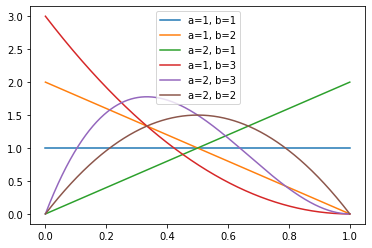

In [ ]:
x = np.linspace(0,1, 1000)
plt.plot(x, stats.beta(a=1,b=1).pdf(x), label='a=1, b=1')
plt.plot(x, stats.beta(a=1,b=2).pdf(x), label='a=1, b=2')
plt.plot(x, stats.beta(a=2,b=1).pdf(x), label='a=2, b=1')
plt.plot(x, stats.beta(a=1,b=3).pdf(x), label='a=1, b=3')
plt.plot(x, stats.beta(a=2,b=3).pdf(x), label='a=2, b=3')
plt.plot(x, stats.beta(a=2,b=2).pdf(x), label='a=2, b=2')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


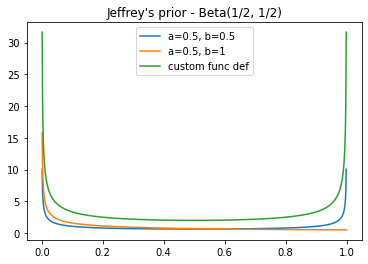

In [ ]:
plt.plot(x, stats.beta(a=0.5,b=0.5).pdf(x), label='a=0.5, b=0.5')
plt.plot(x, stats.beta(a=0.5,b=1).pdf(x), label='a=0.5, b=1')
plt.plot(x, ((x**(-0.5))*((1-x)**(-0.5))), label='custom func def')
plt.legend()
plt.title("Jeffrey's prior - Beta(1/2, 1/2)")
plt.show()

### Dirichlet distribution

It's a multivariate generalization of Beta distribution.

It's PDF is given by -

$f(x|\alpha) = \frac{1}{B(\alpha)} \prod_i^Kx_i^{\alpha_i - 1}$

$ \alpha = (\alpha_1,\alpha_2,...,\alpha_K)$ denotes the concentration parameters $(α_i > 0) $ 

where support x is a standard K-1 simplex, 

x = $(x_1,x_2,..,x_K)$  and follows $ x_i ∈ [0, 1] $

$\sum_i x_i = 1$  i.e the sum of coordinates equal to 1.

K = No. of categories

When K = 2, we get Beta distribution

$B(\alpha)$ is a normalizing constant and is a multivariate Beta function

For example, with K = 3, the support is an equilateral triangle embedded in a downward-angle fashion in three-dimensional space, with vertices at (1,0,0), (0,1,0) and (0,0,1), i.e. touching each of the coordinate axes at a point 1 unit away from the origin.


A dirichlet prior is a conjugate to a multinomial likelihood.

### Generating Dirichlet priors

In [18]:
K = 3 
alpha = (5,5,2)

# Let's initialize topic distribution in a text document with a Dirichlet prior for K=3 topics
dirchlet_prior = np.random.dirichlet(alpha, size=(1,))
dirchlet_prior

array([[0.36839927, 0.39670226, 0.23489847]])

### Multinomial Distribution

In [24]:
# Dice throwing experiment
n = 10                   # Total trials
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

# Get the no. of times we get 1, 2, 3, 4, 5 & 6
np.random.multinomial(n=n, pvals=p)

array([6, 1, 2, 0, 1, 0])

#### References
* https://internal.ncl.ac.uk/ask/numeracy-maths-statistics/images/Poisson_dist.pdf
* http://www.doc.ic.ac.uk/~wbai/notes/Beta/beta.html#:~:text=The%20Dirichlet%20distribution%20is%20a,generalisation%20of%20the%20beta%20distribution.
* https://en.wikipedia.org/wiki/Dirichlet_distribution#:~:text=The%20technical%20term%20for%20the,in%20the%20next%2Dhigher%20dimension.

